In [5]:
from PCA_and_ETC import *

import copy

warnings.filterwarnings("ignore")

In [6]:
i = 4
keys = [0, 1, 2, 3, 4, 5, 6]

if i == 4:
    best = True

else:
    best = False
cluster_names = ['K_mean', 'DBSCAN', 'Agglomerative', 'Contrastive_Learning', 'Best', 'Reversal', 'Contrastive_Learning2']
filename_dict = {keys: cluster_names for keys, cluster_names in zip(keys, cluster_names)}
file_name = filename_dict.get(i)

In [7]:
MOM_merged_df = pd.read_csv('../Database/Momentum1_Winsorized.csv', index_col=0)
# MOM_merged_df=pd.read_csv('../Database/mom_new.csv')
# MOM_merged_df.set_index('Firm Name', inplace=True)
MOM_merged_df.drop(MOM_merged_df.columns[0], axis=1, inplace=True)

base_directory = f'../Database/LS_Result/{file_name}'
output_dir = '../Files/Total_Result/Result'
output_dir2 = '../Files/Total_Result/L_Result'
output_dir3 = '../Files/Total_Result/S_Result'

subdirectories = [d for d in os.listdir(base_directory)]

Agglomerative
Contrastive_Learning
DBSCAN
K-mean
Reversal


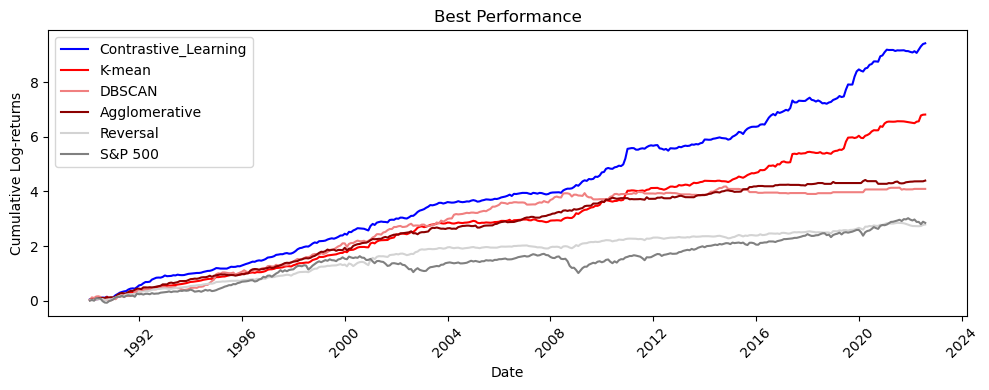

In [8]:
result_df = pd.DataFrame()
result_df2 = pd.DataFrame()
result_df3 = pd.DataFrame()

Long_Short = True
if Long_Short:
    for subdir in subdirectories:
        print(subdir)
        directory = os.path.join(base_directory, subdir)

        LS_merged_df = pd.DataFrame()

        files = sorted(filename for filename in os.listdir(directory) if filename.endswith('.csv'))
        for file in files:
            data = pd.read_csv(os.path.join(directory, file))
            LS_merged_df = merge_LS_Table('Long Short', data, LS_merged_df, file)
            # LS_merged_df = LS_merged_df[~LS_merged_df.iloc[:, 0].duplicated(keep='first')]

        MOM_merged_df_Copy = copy.deepcopy(MOM_merged_df)
        result_df = product_LS_Table(LS_merged_df, MOM_merged_df_Copy, result_df, save=False)

    save_and_plot_result(result_df, output_dir, file_name, subdirectories, best=best)

if not Long_Short:
    for subdir in subdirectories:
        print(subdir)
        directory = os.path.join(base_directory, subdir)

        LS_merged_df2 = pd.DataFrame()
        LS_merged_df3 = pd.DataFrame()

        Files = sorted(filename for filename in os.listdir(directory) if filename.endswith('.csv'))
        for file in Files:
            data = pd.read_csv(os.path.join(directory, file))
            LS_merged_df2 = merge_LS_Table('Long', data, LS_merged_df2, file)
            LS_merged_df3 = merge_LS_Table('Short', data, LS_merged_df3, file)

        result_df2 = product_LS_Table(LS_merged_df2, MOM_merged_df, result_df2, save=False)
        result_df3 = product_LS_Table(LS_merged_df3, MOM_merged_df, result_df3, save=False)

    save_and_plot_result(result_df2, output_dir2, f'Long_{file_name}', subdirectories, best=best)
    save_and_plot_result(result_df3, output_dir3, f'Short_{file_name}', subdirectories, best=best)